# Flexible Image Transport System (FITS) plots 

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import download_file
%matplotlib inline

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', 
                           cache=True,
                           show_progress=True )
#print(image_file)

#### Open file and inspect the data

In [102]:
#Open file 
hdu_list = fits.open(image_file)
#print("File info -^20")
txt1 = "File info"
print(f"{txt1:-^90}")
hdu_list.info()
txt1 = ""
print(f"{txt1:-^90}")

print ("Inspect the first data block")
image_data = hdu_list[0].data
print ("Type:", type (image_data))
print ("Dimension:", image_data.shape)
hdu_list.close()



----------------------------------------File info-----------------------------------------
Filename: C:\Users\Maruf2021\.astropy\cache\download\url\ff6e0b93871033c68022ca026a956d87\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
------------------------------------------------------------------------------------------
Inspect the first data block
Type: <class 'numpy.ndarray'>
Dimension: (893, 891)


#### Plot image

[]

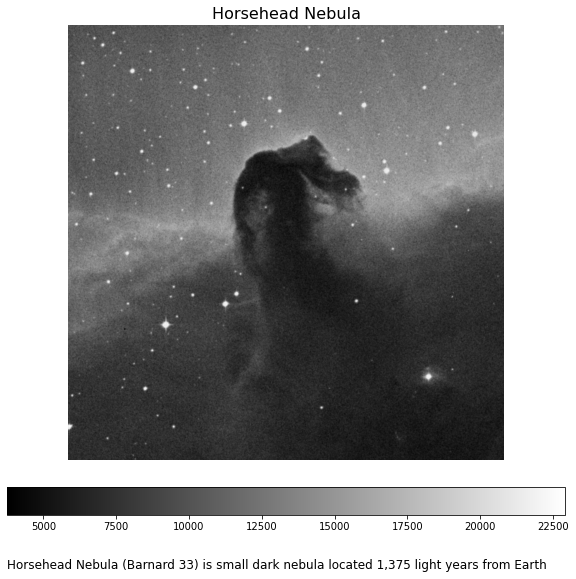

In [109]:
import scipy.ndimage as ndimage

image_data = fits.getdata(image_file)

fig  = plt.figure (figsize = (10, 10))

new_data = ndimage.rotate(image_data, 90, reshape=True)

img_txt = "Horsehead Nebula (Barnard 33) is small dark nebula " +\
           "located 1,375 light years from Earth"
plt.imshow(new_data, cmap = 'gray') # cmap = plt.cm.get_cmap ('jet'))
plt.axis('off')
plt.colorbar(orientation='horizontal', pad=0.05)
plt.figtext(0.5,0.125, img_txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.title("Horsehead Nebula", fontsize=16)
plt.plot()

#### Print image statistics

------------------------------------------------------------------------------------------
Max: 22918
Min: 3759
Mean: 9831.481676287574
Standard deviation: 3032.3927542049046
------------------------------------------------------------------------------------------


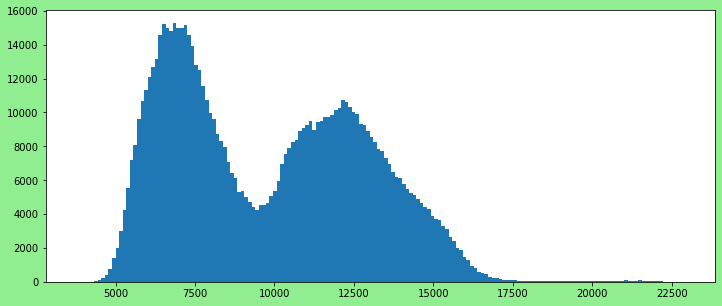

In [104]:
txt1 = ""
print(f"{txt1:-^90}")
print ("Max:",  np.max (image_data))
print ("Min:",  np.min (image_data))
print ("Mean:", np.mean (image_data))
print ("Standard deviation:", np.std (image_data))
txt1 = ""
print(f"{txt1:-^90}")

plt.figure(figsize=(12,5),facecolor='lightgreen',edgecolor='blue')
histogram = plt.hist (image_data.flatten(), bins='auto')


#### Plot image in a logarithmic scale

[]

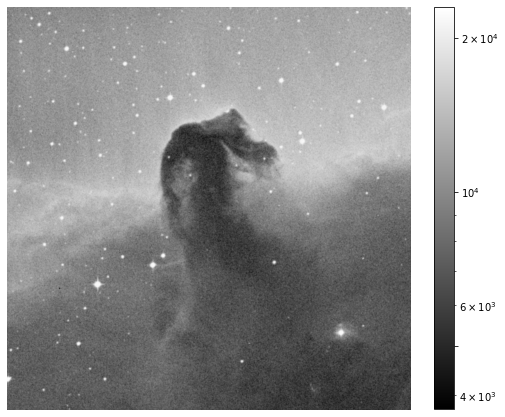

In [119]:
from matplotlib.colors import LogNorm

fig  = plt.figure (figsize = (8, 8))
plt.imshow(new_data, cmap='gray', norm = LogNorm())
plt.axis('off')
cbar = plt.colorbar (ticks= [5.0e3, 1.0e4, 2.0e4], fraction=0.045 )
#cbar.ax.set_yticklabels (['4,000','6,000','10,000', '20000'])
plt.plot()

#### Image stacking

Messier 13 or M13 or Hercules Globular Cluster, 
is a globular cluster of several hundred thousand stars in the constellation of Hercules.
Perform numpy array manipulations to stack several M13 images from a telescope

Following code opens a series of FITS files and store the data in a list.

In [126]:
url = 'http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits'
print (url)

url_list = [download_file (url.format(n), cache=True, show_progress=True )
              for n in range (1, 6)]
image_list = [fits.getdata(image) for image in url_list]

# Next, stacked image will be created from the image list

stacked_image = np.zeros (shape=image_list[0].shape)
for image in image_list:
    stacked_image += image

http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits


Next, a histogram is used find the best stretch for plotting.

vmin and vmax are also set to limit on the color scaling.

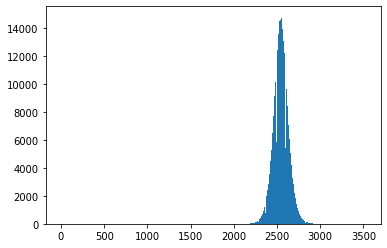

In [127]:
image_hist = plt.hist (stacked_image.flatten(), bins='auto')

[]

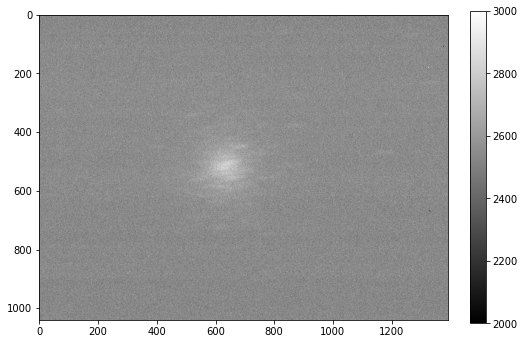

In [139]:
fig  = plt.figure (figsize = (8, 8))
plt.imshow (stacked_image, cmap = 'gray', vmin=2e3, vmax=3e3)
cbar = plt.colorbar (fraction=0.0350 )
plt.plot()

#### Save FITS file

In [ ]:
savefile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU (stacked_image)
hdu.writeto (savefile, overwrite=True)